# 1. Import and Install Dependencies

In [1]:
%pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

c:\Users\Qasim\anaconda3\envs\islsign\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmarks(frame, results)

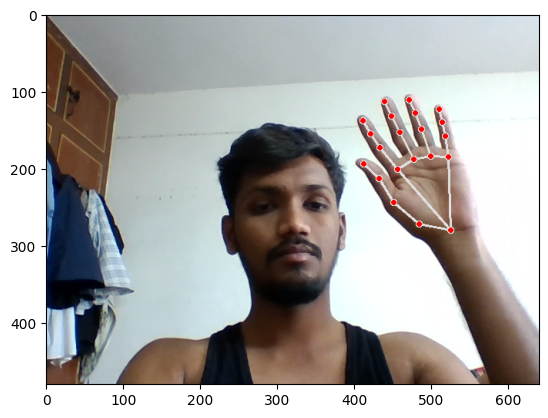

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [9]:
len(results.left_hand_landmarks.landmark)

21

In [10]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [11]:
result_test = extract_keypoints(results)

In [12]:
result_test

array([ 8.21584404e-01,  5.83562315e-01,  2.56011333e-07,  7.57558644e-01,
        5.67288876e-01, -1.96820758e-02,  7.05214620e-01,  5.08599818e-01,
       -2.16964800e-02,  6.75180852e-01,  4.44776177e-01, -2.31094640e-02,
        6.44621074e-01,  4.04423714e-01, -2.33316720e-02,  7.13986993e-01,
        4.20512021e-01,  8.91585741e-03,  6.77953064e-01,  3.61157417e-01,
       -7.69199512e-04,  6.58490539e-01,  3.24433565e-01, -1.23614352e-02,
        6.43282294e-01,  2.88634658e-01, -2.15490647e-02,  7.46119261e-01,
        3.93067151e-01,  8.47561006e-03,  7.18098044e-01,  3.20518494e-01,
        2.90034153e-03,  7.00899184e-01,  2.75735140e-01, -7.10185757e-03,
        6.87455177e-01,  2.37099454e-01, -1.52144544e-02,  7.80592084e-01,
        3.83679748e-01,  2.89550261e-03,  7.61551201e-01,  3.11105371e-01,
       -6.49317261e-03,  7.48744309e-01,  2.68391192e-01, -1.42891277e-02,
        7.37284005e-01,  2.31670290e-01, -2.00458653e-02,  8.16955268e-01,
        3.87149543e-01, -

In [13]:
np.save('0', result_test)

In [14]:
np.load('0.npy')

array([ 8.21584404e-01,  5.83562315e-01,  2.56011333e-07,  7.57558644e-01,
        5.67288876e-01, -1.96820758e-02,  7.05214620e-01,  5.08599818e-01,
       -2.16964800e-02,  6.75180852e-01,  4.44776177e-01, -2.31094640e-02,
        6.44621074e-01,  4.04423714e-01, -2.33316720e-02,  7.13986993e-01,
        4.20512021e-01,  8.91585741e-03,  6.77953064e-01,  3.61157417e-01,
       -7.69199512e-04,  6.58490539e-01,  3.24433565e-01, -1.23614352e-02,
        6.43282294e-01,  2.88634658e-01, -2.15490647e-02,  7.46119261e-01,
        3.93067151e-01,  8.47561006e-03,  7.18098044e-01,  3.20518494e-01,
        2.90034153e-03,  7.00899184e-01,  2.75735140e-01, -7.10185757e-03,
        6.87455177e-01,  2.37099454e-01, -1.52144544e-02,  7.80592084e-01,
        3.83679748e-01,  2.89550261e-03,  7.61551201e-01,  3.11105371e-01,
       -6.49317261e-03,  7.48744309e-01,  2.68391192e-01, -1.42891277e-02,
        7.37284005e-01,  2.31670290e-01, -2.00458653e-02,  8.16955268e-01,
        3.87149543e-01, -

# 4. Setup Folders for Collection

In [8]:
# Path for exported data, numpy arrays
# DATA_PATH = os.path.join('C:/Users/Qasim/Documents/Major Project/ActionDetectionforSignLanguage-main/dataset') 
DATA_PATH = os.path.join(r'C:\Users\Qasim\Documents\Major_Project\ActionDetectionforSignLanguage-main\Dataset') 


# Actions that we try to detect
actions = np.array(['Accident',  'Call',  'Doctor',  'Help', 'Hot', 'Lose', 'Pain', 'Thief'])

# # Thirty videos worth of data
# no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

### making directory

In [14]:
import os
import numpy as np

for action in actions: 
    action_path = os.path.join(DATA_PATH, action)
    print("Checking action path:", action_path)
    
    if not os.path.exists(action_path):
        os.makedirs(action_path)
        print("Directory created:", action_path)
    else:
        print("Directory already exists:", action_path)
    
    #change this 
    for sequence in range(31, 61):
        new_dir = os.path.join(action_path, str(sequence))
        print("Creating directory:", new_dir)
        
        if not os.path.exists(new_dir):
            os.makedirs(new_dir)
            print("Sequence directory created:", new_dir)
        else:
            print("Sequence directory already exists:", new_dir)
            continue


Checking action path: C:\Users\Qasim\Documents\Major_Project\ActionDetectionforSignLanguage-main\dataset\Accident
Directory already exists: C:\Users\Qasim\Documents\Major_Project\ActionDetectionforSignLanguage-main\dataset\Accident
Creating directory: C:\Users\Qasim\Documents\Major_Project\ActionDetectionforSignLanguage-main\dataset\Accident\31
Sequence directory created: C:\Users\Qasim\Documents\Major_Project\ActionDetectionforSignLanguage-main\dataset\Accident\31
Creating directory: C:\Users\Qasim\Documents\Major_Project\ActionDetectionforSignLanguage-main\dataset\Accident\32
Sequence directory created: C:\Users\Qasim\Documents\Major_Project\ActionDetectionforSignLanguage-main\dataset\Accident\32
Creating directory: C:\Users\Qasim\Documents\Major_Project\ActionDetectionforSignLanguage-main\dataset\Accident\33
Sequence directory created: C:\Users\Qasim\Documents\Major_Project\ActionDetectionforSignLanguage-main\dataset\Accident\33
Creating directory: C:\Users\Qasim\Documents\Major_Pro

# 5. Collect Keypoint Values for Training and Testing

### collecting images

In [19]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(0,31):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)

                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))

                # Create the directory if it doesn't exist
                os.makedirs(os.path.dirname(npy_path), exist_ok=True)
                
                # Save keypoints to npy_path
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

            # print('Completed collecting frames for {} Video number{}'.format(action, sequence))
            cv2.putText(image, 'Completed collecting frames for {} Video number{}'.format(action, sequence), (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
            cv2.waitKey(3000)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
             
    cap.release()
    cv2.destroyAllWindows()

In [17]:
def check_missing_sequences(actions, no_sequences, sequence_length):
    missing_sequences = []
    for action in actions:
        for video_num in range(no_sequences):
            for sequence_num in range(sequence_length):
                npy_path = os.path.join(DATA_PATH, action, str(video_num), str(sequence_num) + '.npy')
                if not os.path.exists(npy_path):
                    missing_sequences.append((action, video_num, sequence_num))
    return missing_sequences

In [18]:
missing_sequences = check_missing_sequences(actions, no_sequences, sequence_length)
print("Missing sequences:", missing_sequences)

Missing sequences: []


In [19]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [21]:
label_map = {label:num for num, label in enumerate(actions)}

In [22]:
label_map

{'Accident': 0,
 'Call': 1,
 'Doctor': 2,
 'Help': 3,
 'Hot': 4,
 'Lose': 5,
 'Pain': 6,
 'Thief': 7}

In [23]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [24]:
np.array(sequences).shape

(240, 30, 1662)

In [25]:
np.array(labels).shape

(240,)

In [26]:
X = np.array(sequences)

In [27]:
X.shape

(240, 30, 1662)

In [28]:
y = to_categorical(labels).astype(int)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [30]:
y_test.shape

(12, 8)

# 7. Build and Train LSTM Neural Network

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [32]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [33]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

c:\Users\Qasim\anaconda3\envs\islsign\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [41]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - categorical_accuracy: 0.0876 - loss: 4.0300
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - categorical_accuracy: 0.1081 - loss: 5.5191
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - categorical_accuracy: 0.1133 - loss: 2.2302
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - categorical_accuracy: 0.1568 - loss: 2.0666
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - categorical_accuracy: 0.2352 - loss: 2.0540
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - categorical_accuracy: 0.1087 - loss: 1.9437
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - categorical_accuracy: 0.4128 - loss: 1.7112
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - categorical_accuracy: 0.3202 - loss: 1.8667
Epoch 9/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - categorical_accuracy: 0.2993 - loss: 1.7943
Epoch 10/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - categorical_accuracy: 0.3941 - loss: 1.5642
Epoch 11/2000
8/8 ━━━━━━━━━━

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 596,840 (2.28 MB)

 Trainable params: 596,840 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

# 8. Make Predictions

In [36]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step


In [37]:
actions[np.argmax(res[4])]

'Thief'

In [38]:
actions[np.argmax(y_test[4])]

'Thief'

# 9. Save Weights

In [39]:
model.save('action.h5')

In [40]:
del model

# Load Model from weights

In [41]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [48]:
actions.shape[0]

8

In [42]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [43]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [44]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [45]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step


In [46]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [57]:
ytrue

[1, 1, 4, 5, 7, 5, 5, 3, 3, 6, 7, 3]

In [58]:
yhat

[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]

In [56]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[10,  0],
        [ 2,  0]],

       [[ 9,  0],
        [ 3,  0]],

       [[11,  0],
        [ 1,  0]],

       [[ 9,  0],
        [ 3,  0]],

       [[11,  0],
        [ 1,  0]],

       [[ 0, 10],
        [ 0,  2]]], dtype=int64)

In [64]:
accuracy_score(ytrue, yhat)

0.08333333333333333

# 11. Test in Real Time

In [59]:
from scipy import stats

In [60]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [61]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [62]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

c:\Users\Qasim\anaconda3\envs\islsign\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

InvalidArgumentError: Graph execution error:

Detected at node sequential_1_1/lstm_3_1/while/body/_1/sequential_1_1/lstm_3_1/while/lstm_cell_1/MatMul defined at (most recent call last):
<stack traces unavailable>
Matrix size-incompatible: In[0]: [1,126], In[1]: [1662,256]
	 [[{{node sequential_1_1/lstm_3_1/while/body/_1/sequential_1_1/lstm_3_1/while/lstm_cell_1/MatMul}}]] [Op:__inference_one_step_on_data_distributed_2023]

: 